In [1]:
#Ranges
ranges=[]

#Poinst Array
pointsArray = reshape([], 0, 0)

function generate_points(N)
    global ranges
    global pointsArray = zeros(Int64, N, 2)
    push!(ranges, -100)
    push!(ranges, 100)
    push!(ranges, -100)
    push!(ranges, 100)
    for i=1:N
        pointsArray[i, 1]=typemin(Int64)
        pointsArray[i, 2]=typemax(Int64)
    end
    
    for i=1:N
        flag=0
        tmpFirst = rand(ranges[1]: ranges[2])
        tmpSecond = rand(ranges[3] : ranges[4])
        for i=1:N
            if pointsArray[i, 1]==tmpFirst
                if pointsArray[i, 2]==tmpSecond
                    flag=1
                end
            end
        end
        pointsArray[i, 1]=tmpFirst
        pointsArray[i, 2]=tmpSecond
    end
    return pointsArray
end

generate_points (generic function with 1 method)

In [2]:
function calculateWay(map, N)
    sum = 0
    for i=2:N
        firstX = map[i-1, 1]
        firstY = map[i-1, 2]
        secX = map[i, 1]
        secY = map[i, 2]
        tmp = sqrt((secX-firstX)^2 + (secY-firstY)^2)
        sum += tmp
    end
    return sum
end

calculateWay (generic function with 1 method)

In [3]:
function simulatedAnnealing(mapPoints, N, T, Limit)
    for i=1:Limit
        x0 = rand(2:N-1)
        shift = rand(0:1)
        if shift == 0
            shift -= 1
        end
        mapPointsTmp = mapPoints
        mapPointsTmp[x0,1]=mapPoints[x0+shift, 1]
        mapPointsTmp[x0,2]=mapPoints[x0+shift, 2]
        mapPointsTmp[x0+ shift,1]=mapPoints[x0, 1]
        mapPointsTmp[x0 + shift,2]=mapPoints[x0, 2]
        delta = calculateWay(mapPoints, N) - calculateWay(mapPointsTmp, N)
        probability = exp(delta/T)
        u= rand(Float64)
        if probability >= u
            mapPoints = mapPointsTmp
        end
        T*=0.95
    end
end

simulatedAnnealing (generic function with 1 method)

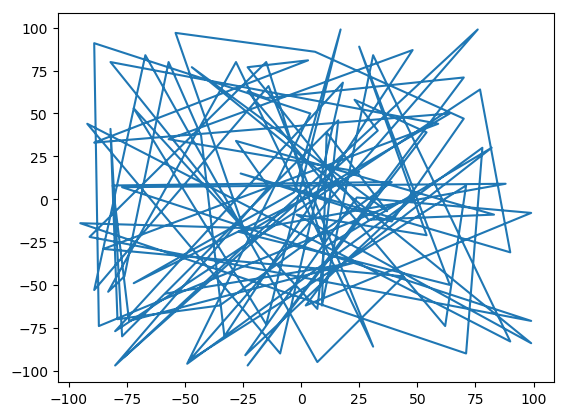

11968.857308132829


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001F65D320>

In [4]:
using PyPlot

N=100
mapPoints = generate_points(100)
println(calculateWay(mapPoints, N))
PyPlot.plot(mapPoints[:,1], mapPoints[:,2])

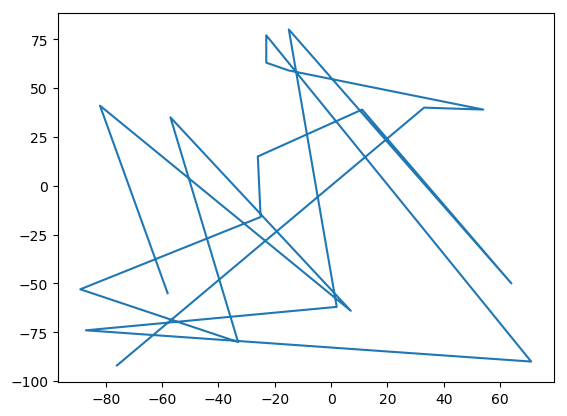

1809.1428863216815


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000239FCB70>

In [5]:
Temperature=100
Limit=1000
simulatedAnnealing(mapPoints, N, Temperature, Limit)
println(calculateWay(mapPoints, N))
PyPlot.plot(mapPoints[:,1], mapPoints[:,2])

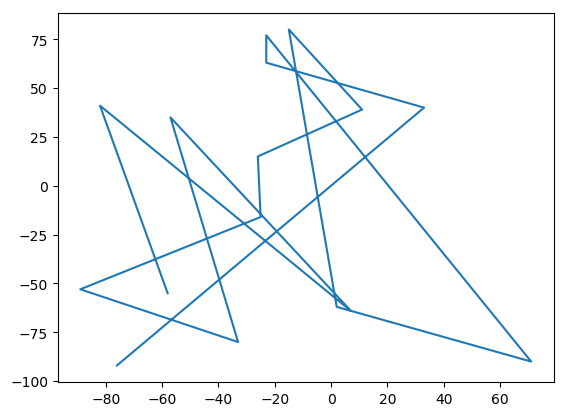

1386.5668823195344


1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x0000000025D97D68>

In [6]:
simulatedAnnealing(mapPoints, N, Temperature, Limit)
println(calculateWay(mapPoints, N))
PyPlot.plot(mapPoints[:,1], mapPoints[:,2])